# Social analysis on the transfer market in the Swiss Football League

TEXT BLA BLA BLA

*Research Question:* 

"Based on the  assumption that Players transfer to regions with similar Language, can we identify contradicting Patterns in the Swiss Football-League?"

**Module:**    Analysis and Modelling of Social Interactions | W.MSCIDS_AMS03.H2001 <br>
**Semester:**  HS20 #the-covid-one <br>
**Lecturers:** Isabel Raabe, Nicolas Perony <br>
**Authors:**    Gino Cattelan, Konstantinos Lessis, Nico Wyss <br>

Date:   18. December 2020

## TOC:
* [Import Packages](#import-packages)
* [Second Bullet Header](#second-bullet)


### Import Packages <a class="anchor" id="import-packages"></a>

In [1]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import approximation
from networkx.algorithms import community as nxcom
import pandas as pd
import numpy as np

### Design approach for our graphs

Approach for a good graph layout we aim for:

1. **Minimum edges intersection** <br>
Too many intersections make the plot look messy. If applicable we will try to minimize dimensions.

2. **Adjacent vertices are closer to each other than not adjacent** <br>
Connected nodes should be close to each other. This represents the main information that is present in a graph by definition.

3. **Communities are grouped into clusters** <br>
If there are a set of vertices that are connected to each other more frequent then to other parts of the graph, they should look like a dense cloud.

4. **Minimum overlapping edges and nodes.**<br>
If we cannot determine if there few vertices or one, then the readability of plot is poor.

### Read scraped data

In [8]:
# Read Data and create first Graphs
df = pd.read_csv("final_clean.csv", sep= ';')
df.shape #see for more details about features scraping notebook

(4028, 12)

### Create graphs with module networkx

In [9]:
# Multi Directed Graph
GMD = nx.from_pandas_edgelist(df,
                            edge_attr = True,
                            source = 'From',
                            target = 'To',
                            create_using = nx.MultiDiGraph())

# Multi Graph
GM = nx.from_pandas_edgelist(df,
                            edge_attr = True,
                            source = 'From',
                            target = 'To',
                            create_using = nx.MultiGraph())

# Standard Graph
G = nx.from_pandas_edgelist(df,
                            edge_attr = True,
                            source = 'From',
                            target = 'To',
                            create_using = nx.Graph())


In [10]:
# create adjacency matrix from created plot
adj = nx.to_pandas_adjacency(G, dtype=int)
adj.shape # a lot of features -> could be a candidate for some PCA, UMAP, tSNE

(900, 900)

## Attributes of generated graphs
Lets have a quick look over the fundamentals of our directed and undirected graphs.

In [11]:
graphs = [GMD, GM, G]
temp = [print(nx.info(i)) for i in graphs] #we lose a lot of data point if we work without a MultiGraph

Name: 
Type: MultiDiGraph
Number of nodes: 900
Number of edges: 4028
Average in degree:   4.4756
Average out degree:   4.4756
Name: 
Type: MultiGraph
Number of nodes: 900
Number of edges: 4028
Average degree:   8.9511
Name: 
Type: Graph
Number of nodes: 900
Number of edges: 1659
Average degree:   3.6867


In [12]:
# as an example to check if the transfers are connected logically
print("List of clubs that transfered player(s) in the past years to FC Luzern: \n \n", list(GMD.successors("FC Luzern"))) 

List of clubs that transfered player(s) in the past years to FC Luzern: 
 
 ['FC Basel', 'FC Zürich', 'BSC Young Boys', 'FC Sion', 'FC Thun', 'Inter Mailand', 'Beerschot V.A.', 'Grasshoppers', 'Xamax', 'FC Aarau', 'SC Kriens', 'Ankaragücü', 'CD Teneriffa', 'Vereinslos', 'FC Augsburg', 'Legia Warschau', 'Maccabi Netanya', 'FC Winterthur', 'FC Vaduz', 'Lausanne-Sport', 'ZSKA Sofia', 'FC Chiasso', 'SC Cham', 'FC Lugano', 'FC Emmen', 'Karriereende', 'Górnik Zabrze', 'Servette FC', 'Kasimpasa', 'Quakes', 'FC Wohlen', 'FC Dallas\t', 'CD Tondela', 'Atal. Bergamo', 'FC Wil 1900', 'Lechia Gdansk', 'C. Rizespor', 'Bari', 'FC Wacker', 'FSV Frankfurt', 'Erzgebirge Aue', 'FC Muri', 'Minnesota Utd.', 'Luzern U21', 'FC Ingolstadt', 'Melbourne Vict.', 'Sheriff', 'Bnei Yehuda', 'FC Schaffhausen', 'Orlando City SC', 'FC St. Gallen', 'Calcio Como', 'Le Mont LS', 'FC Biel-Bienne', 'Club Africain', 'Barcelona SC', 'Konyaspor', 'FC Sevilla', 'Enppi SC', 'FC Ebikon', 'Anorthosis', 'pausiert', 'AC Bellinzona'

#### local clustering coefficient
We determine the local clustering coefficient, which is the fraction of pairs of the nodes connections that are connected with each other, to gain insight about the connectivity within our network. **The average clustering coefficient is 0.28**. It is calculated by dividing the sum of all the local clustering coefficients  by the number of nodes. This implies that we should have a vast amount (from those 900 nodes) with a very low connectivity. This somehow does not surprise us, since we expected the swiss football clubs to transfer a lot young talents from different small local clubs or from not often seen foreign clubs.

In [13]:
nx.average_clustering(G)

0.2869315793190967

## Plot the graphs for first insights 

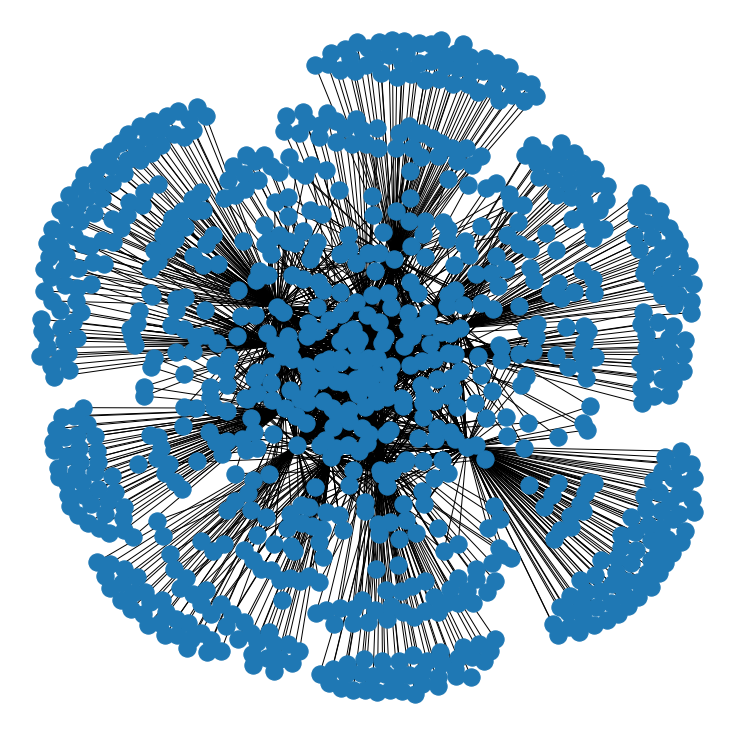

In [14]:
pos = nx.spring_layout(GM)
fig = plt.figure(figsize=(10, 10))
nx.draw(GM, pos , with_labels = False)

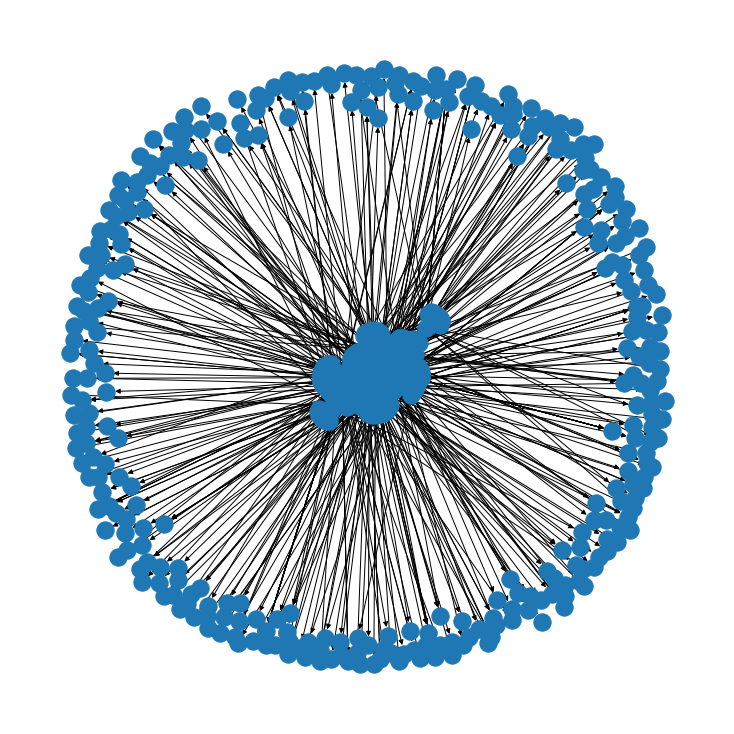

In [15]:
pos = nx.spring_layout(GMD)
fig = plt.figure(figsize=(10, 10))
nx.draw(GMD, pos , with_labels = False)

#### Conclusion from graph plotting (oben Farben mit Sprachen einfügen)

bla bla bla 

### Key metrices & Network structure

#### Structure  
**1. Communities**

The football-transfer dataset with allowed **multiple connections** has **45 communities**. <br>
The football-transfer dataset with multiple connections excluded has **13 communities**.

A more detailed analysis on the communities will be made later.

**2. Modularity**

To analyse the groups within the network, we will have to define the modularity as attributes to nodes and edges. As metric high modularity of a network implies dense connections between the nodes within clusters, but sparse connections between nodes in different communities.

The overall **modularity** factor for the **multigraph (GM)** is around **0.26** which is quite loq. The transfermarket is still diversified enough, to allow players to transfer (theoretically and in a simplified world without regarding individual skillsets) within the network, also if one of the big clubs would stop buying and selling players for a season.

<br>

#### Who is Who?  

With the following key metrices, we would like to find out with different approaches who is important as contributor within the network and whos not.  

**3. Degree Centrality** 

With the degree centrality we simply define who has the most connections to other nodes. We found that these are the clubs with the highest buyin / selling connections over all scraped seasons and in regard with the multiple connections allowed: <br> 

The 4 most important clubs (ltr) regarding their absolut amount of connections:

```python
sorted(degCent_GM, key=degCent_GM.get, reverse=True)[:4] 

['FC Lugano', 'FC Sion', 'Grasshopper Club Zürich', 'FC Basel']
````

**4. Betweenness Centrality**  

The betweenness centrality quantifies how many times a node comes in the shortest chosen path between two other nodes. In our dataset, nodes with high betweenness centrality play a significant role in the transfer network, since the most transfers within swiss football league (remember selection bias) flow through those nodes. We assume clubs with a high betweenness centrality define strategic decsissions in buying & selling players for smaller clubs regarding to time of the transaction and its volume.

The 4 most important clubs regarding their absolut amount of connections with at least another sell or buy action:

```python
sorted(betCent, key=betCentG.get, reverse=True)[:4]

['FC Lugano', 'FC Sion', 'FC Lausanne-Sport', 'Grasshopper Club Zürich']
````
**5. Eigenvector Centrality**

To furhter define how important a node is in regarding its connections, we will meassure the eigenvector centrality. This metric decides if a node is important if it is connected to other important edges and not just by the amount of connections.

The 4 most important clubs regarding its connection to other important clubs are:

```python
sorted(eigCent_G, key=eigCent_G.get, reverse=True)[:4]

['FC Sion', 'FC Basel', 'FC Lugano', 'FC St. Gallen']
````

Even though FC Sion transfers the most with other important clubs, we have to mention that the eigenvector was not computable for MultiGraphs.


#### Metric preparation

In [16]:
# Find the communities for non directional graphs with Clauset-Newman-Moore greedy modularity maximization 
# http://ece-research.unm.edu/ifis/papers/community-moore.pdf

communities_G   = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse = False)
communities_GM = sorted(nxcom.greedy_modularity_communities(GM), key=len, reverse = False)

# communities_GMD = sorted(nxcom.greedy_modularity_communities(GMD), key=len, reverse = False) 
# not applicable, see Disclaimer & scientific delimitation  at bottom

# save above disucessed metrices

degCent_G =  nx.degree_centrality(G)
degCent_GM = nx.degree_centrality(GM)
degCent_GMD = nx.degree_centrality(GMD) #same as undirected, since connection count

betCentG = nx.betweenness_centrality(G, normalized=True, endpoints=True)
# betCent = nx.betweenness_centrality(GM, normalized=True, endpoints=True)  - not applicable
# betCent = nx.betweenness_centrality(GMD, normalized=True, endpoints=True) - not applicable

eigCent_G   = nx.eigenvector_centrality(G)
# eigCent_GM  = nx.eigenvector_centrality(GM)  - not applicable
# eigCent_GMD = nx.eigenvector_centrality(GMD) - not applicable

#sort and return important clubs 

sorted(degCent_G, key=degCent_G.get, reverse=True)[:4]
sorted(degCent_GM, key=degCent_GM.get, reverse=True)[:4]
sorted(degCent_GMD, key=degCent_GMD.get, reverse=True)[:4]
sorted(betCentG, key=betCentG.get, reverse=True)[:4]
sorted(eigCent_G, key=eigCent_G.get, reverse=True)[:4]


['FC Sion', 'FC Basel', 'FC Lugano', 'FC St. Gallen']

In [17]:
# Count the communities
print(f"The football-transfer dataset with allowed multiple connections has {len(communities_GM)} communities.")
print(f"The football-transfer dataset with multiple connections excluded has {len(communities_G)} communities.")

The football-transfer dataset with allowed multiple connections has 45 communities.
The football-transfer dataset with multiple connections excluded has 13 communities.


(-1.0990615874528884,
 1.0802933365106582,
 -1.0755674719810486,
 1.0987024188041687)

/Users/nicowyss/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nicowyss/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


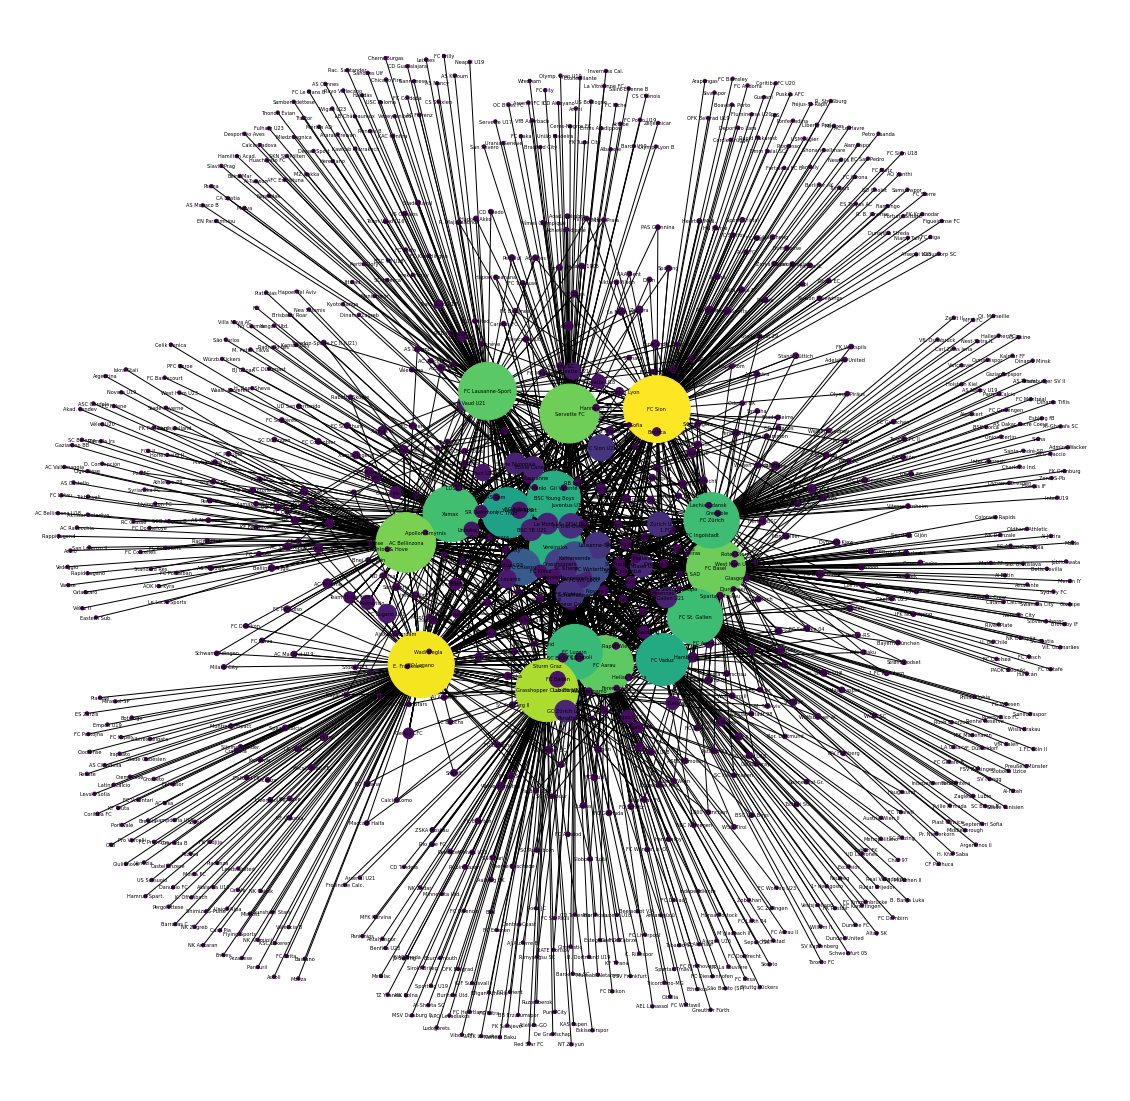

In [18]:
pos = nx.spring_layout(GM)

node_color = [20000.0 * GM.degree(v) for v in G]
node_size =  [v * 10000 for v in degCent_GM.values()]

plt.figure(figsize = (20,20))

nx.draw_networkx(GM, pos=pos, with_labels= True,
                 node_color=node_color,
                 node_size=node_size,
                 font_size = 5
                 )
plt.axis('off')

## Community detection & analysis
The following section searches with the help of predefined algortihms for communities within the network. What communities can we find beside the already expected language cohorts. 

**1. Greedy modularity maximization** <br> The first approach targets the  probability of how like it is to belong to one or the other group. In particular, it finds communities in graph using Clauset-Newman-Moore greedy modularity maximization. Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.

**2. K-Cores** <br> "A k-core of a graph G is a maximal connected subgraph of G in which all vertices have degree at least k. Equivalently, it is one of the connected components of the subgraph of G formed by repeatedly deleting all vertices of degree less than k. If a non-empty k-core exists, then, clearly, G has degeneracy at least k, and the degeneracy of G is the largest k for which G has a k-core."

<img src="../02_analysis/images/2-core.png" />

**3. Cliques**

In [19]:
# Find the communities for non directional graphs
communities_G   = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse = False)
communities_GM = sorted(nxcom.greedy_modularity_communities(GM), key=len, reverse = False)

# Count the communities
print(f"The football-transfer dataset with allowed multiple connections has {len(communities_GM)} communities.")
print(f"The football-transfer dataset with multiple connections excluded has {len(communities_G)} communities.")


The football-transfer dataset with allowed multiple connections has 45 communities.
The football-transfer dataset with multiple connections excluded has 13 communities.


#### Define helper functions 
The following section defines our helper functions to add the new attribute "community" to each node and node with the help of the above defined communites (by baeysian algorithm)

In [20]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b) 

#### Print first graph with insights about communities in Dataset


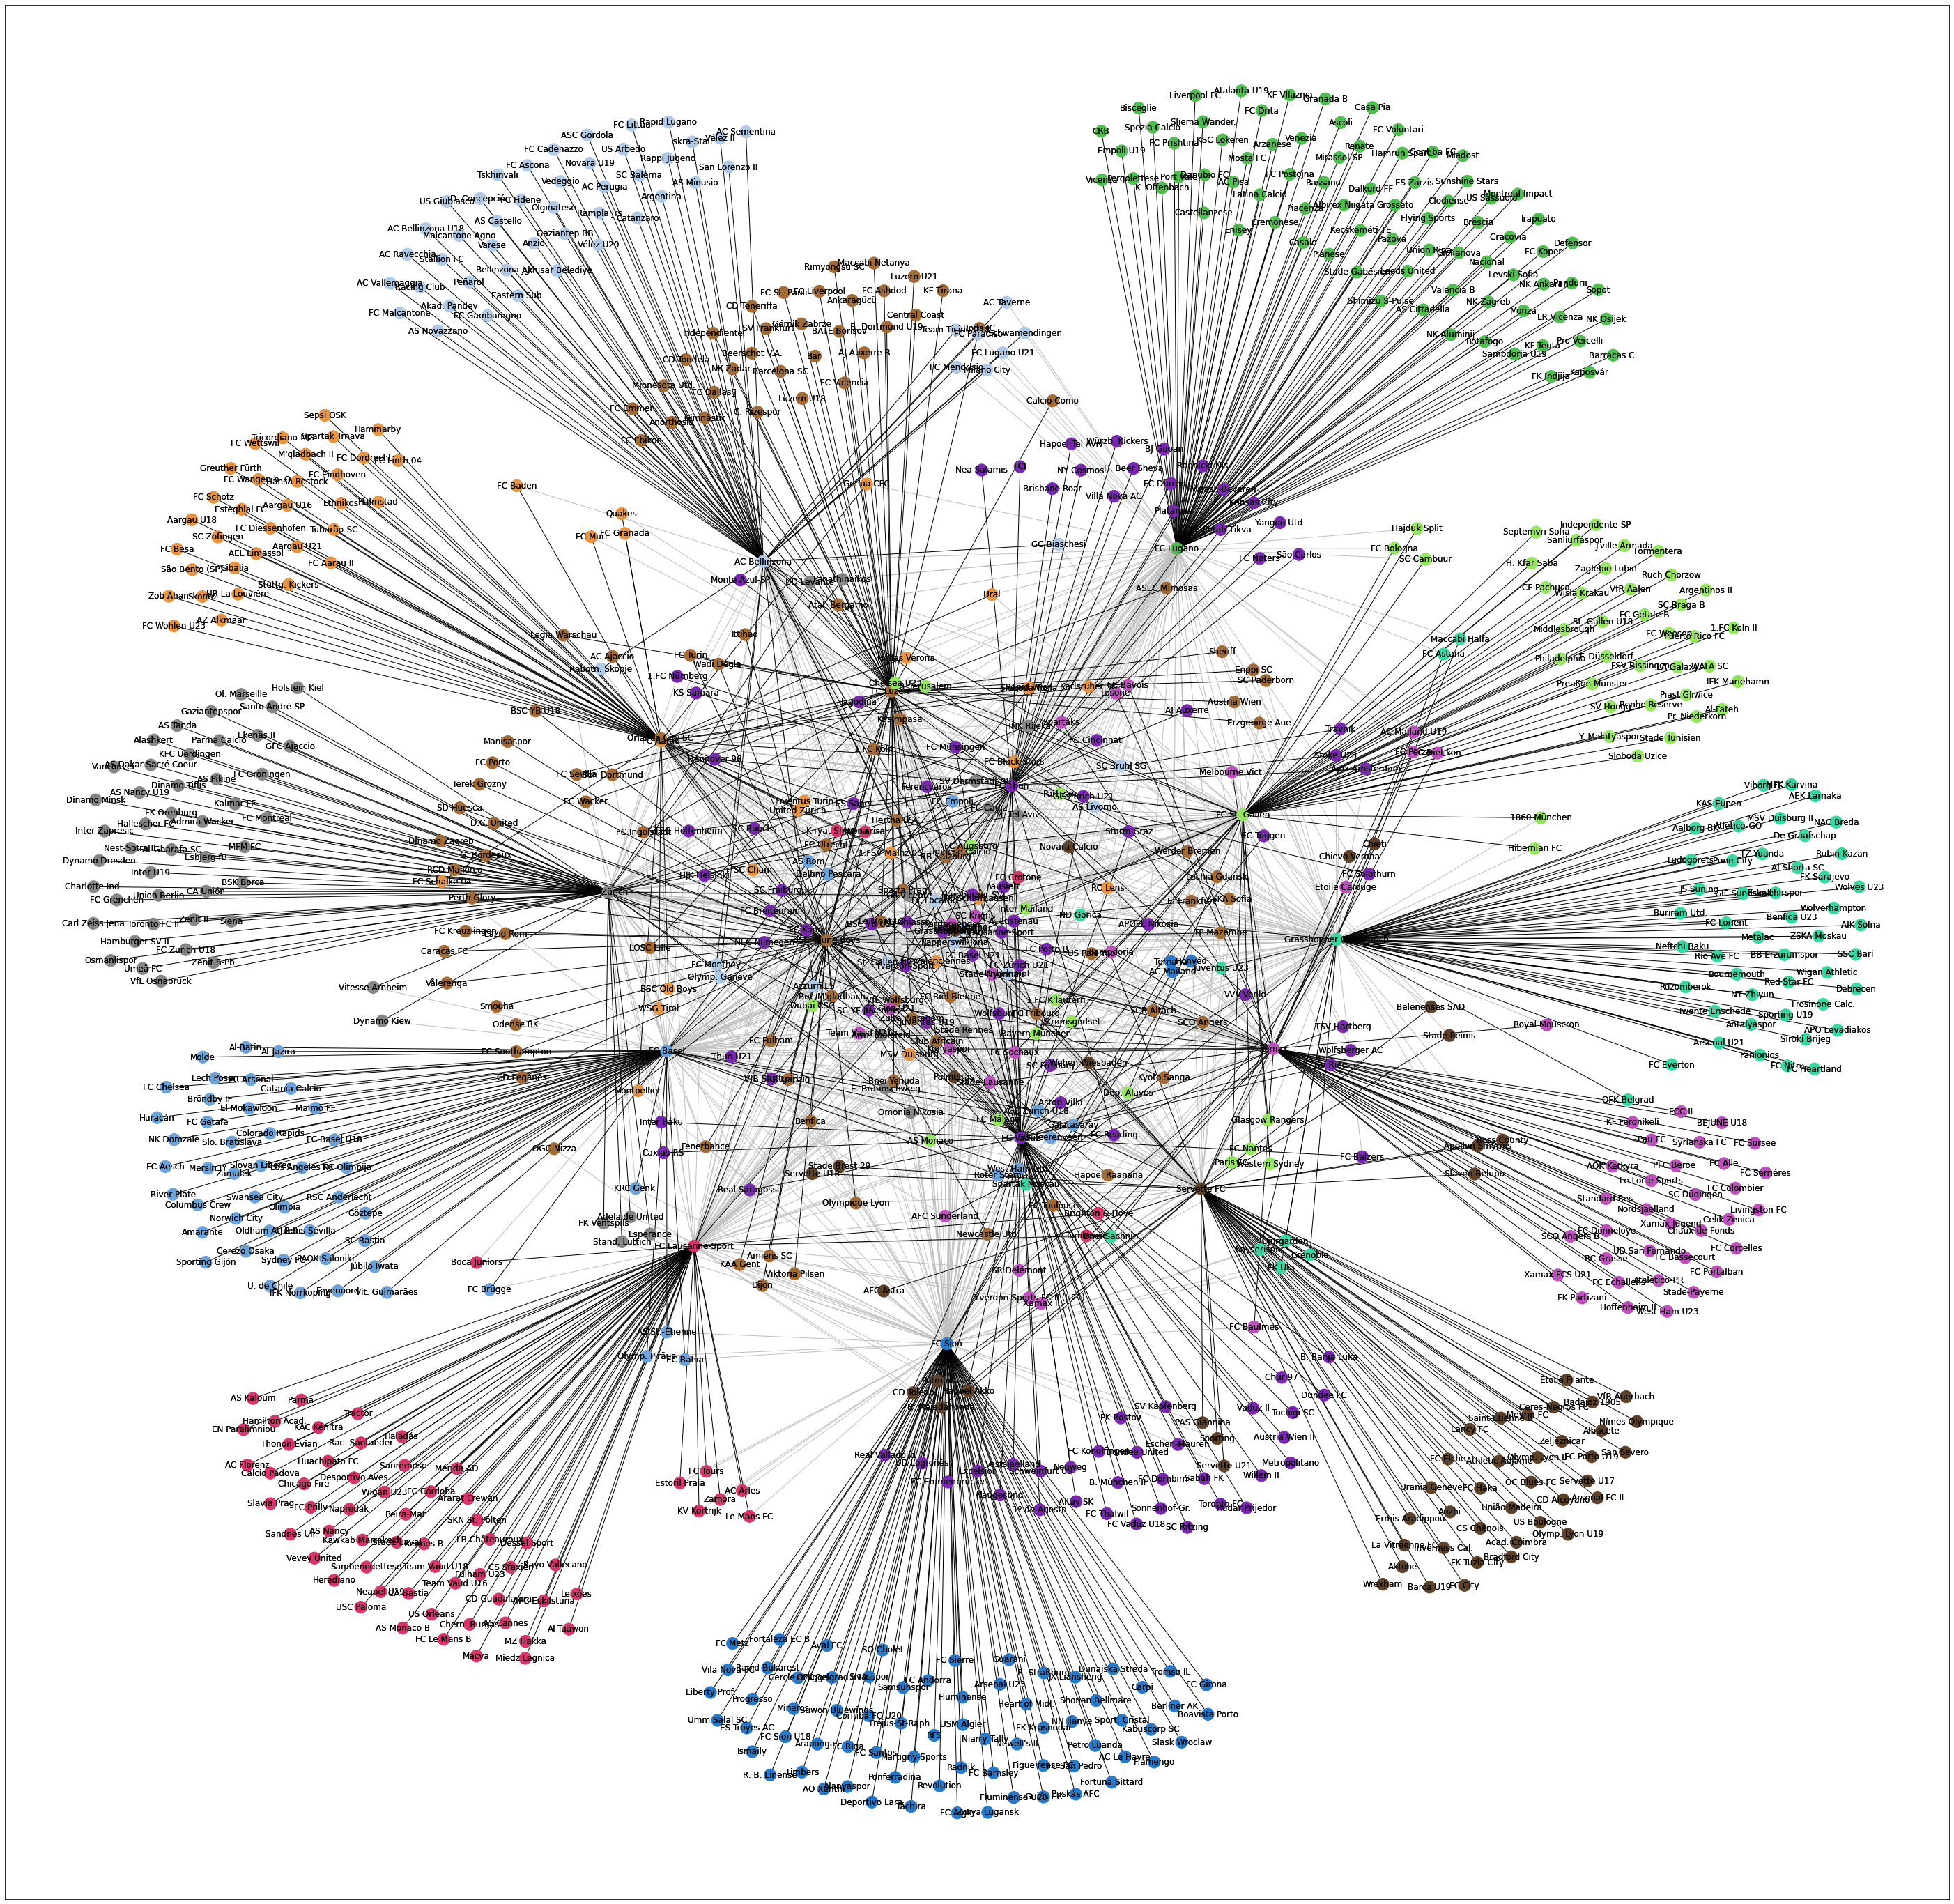

In [21]:
# Set node and edge communities for standard Graph *G* and communities *G*
set_node_community(G, communities_G)
set_edge_community(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for edges between members of the same community for standard Graph *G* and communities *G*
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

# Settings for plotting
pos_plot = nx.spring_layout(G)
fig = plt.figure(figsize=(50, 50))

# Draw external edges
nx.draw_networkx(
    G,
    pos = pos_plot,
    node_size=0,
    edgelist=external,
    edge_color="silver")

# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos= pos_plot,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

#fig.savefig('temp.pdf')

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))
# cores with at lest degree 5 (5 or more transfers / connections)
G_core_5 = nx.k_core(G, 5)
# similarly, with at least degree 10 (10 or more transfers / connections)
G_core_10 = nx.k_core(G, 10)
# similarly, with at least degree 15 (15 or more transfers / connections)
G_core_20 = nx.k_core(G, 15)

# Settings for plotting
fig = plt.figure(figsize=(20, 20))

# Visualize network and k-cores
plt.style.use('dark_background')
pos = nx.spring_layout(G, k=0.005)
nx.draw_networkx(
    G, pos=pos, node_size=0, edge_color="#333333", alpha=0.8, with_labels=False)
nx.draw_networkx(
    G_core_5, pos=pos, node_size=0, edge_color="red", alpha=0.5, with_labels=False)
nx.draw_networkx(
    G_core_10, pos=pos, node_size=0, edge_color="blue", alpha=0.5, with_labels=False, )
nx.draw_networkx(
    G_core_20, pos=pos, node_size= 0, edge_color="green", edge_size = 0, alpha=0.9, with_labels=True, font_size=16,  font_color = 'white')



In [ ]:
nx.is_strongly_connected(GMD)


Disclaimer :

The problem of clustering in directed networks is considered to be a more challenging task as compared
to the undirected case. Highlighting the difficulties of the problem, in his resent work Santo Fortunato
stated that “Developing methods of community detection for directed graphs is a hard task. For instance,
a directed graph is characterized by asymmetrical matrices (adjacency matrix, Laplacian, etc.), so spectral analysis is much more complex. Only a few methods can be easily extended from the undirected to the directed
case. Otherwise, the problem must be formulated from scratch” 
    
https://arxiv.org/pdf/1308.0971.pdf
    
Example: 

Not iteratable.

```python
# Set node and edge communities for standard Graph *G* and communities *G*
set_node_community(GM, communities_GM)
set_edge_community(GM)

node_color = [get_color(GM.nodes[v]['community']) for v in GM.nodes]

# Set community color for edges between members of the same community for standard Graph *G* and communities *G*
external = [(v, w) for v, w in GM.edges if GM.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in GM.edges if GM.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

# Settings for plotting
pos_plot = nx.spring_layout(GM)
fig = plt.figure(figsize=(50, 50))

# Draw external edges
nx.draw_networkx(
    GM,
    pos = pos_plot,
    node_size=0,
    edgelist=external,
    edge_color="silver")

# Draw nodes and internal edges
nx.draw_networkx(
    GM,
    pos= pos_plot,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)
````

